# Disease Prediction using Machine Learning Algorithms

### Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report


### Loading Data

#### Main Dataset

In [31]:
df = pd.read_csv('../dataset/dataset_modified.csv')
print(df.head())


            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1            joint_pain       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

#### Symptom Severity Dataset

In [32]:
df1 = pd.read_csv('../dataset/Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


#### Symptom Description Dataset

In [33]:
df2 = pd.read_csv('../dataset/symptom_Description.csv')
print(df2.head())

          Disease                                        Description
0   Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1         Malaria  An infectious disease caused by protozoan para...
2         Allergy  An allergy is an immune system response to a f...
3  Hypothyroidism  Hypothyroidism, also called underactive thyroi...
4       Psoriasis  Psoriasis is a common skin disorder that forms...


#### Symptom Precaution Dataset

In [34]:
df3 = pd.read_csv('../dataset/symptom_precaution.csv')
print(df3.head())

          Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths  


#### List of Diseases

In [35]:
diseases = set(df['Disease'])

print(diseases)
print('\n There are {} diseases described in the dataset'.format(len(diseases)))



{'Typhoid', 'Alcoholic hepatitis', 'hepatitis A', 'Hypertension ', 'Jaundice', 'Migraine', 'Chronic cholestasis', 'Malaria', 'Heart attack', 'Osteoarthristis', 'Hyperthyroidism', 'Hepatitis C', 'Dengue', 'Arthritis', 'Tuberculosis', '(vertigo) Paroymsal  Positional Vertigo', 'GERD', 'Impetigo', 'Hepatitis D', 'Hepatitis E', 'Hypothyroidism', 'Urinary tract infection', 'Allergy', 'Paralysis (brain hemorrhage)', 'Gastroenteritis', 'Fungal infection', 'Chicken pox', 'Acne', 'Drug Reaction', 'Varicose veins', 'Diabetes ', 'Common Cold', 'Peptic ulcer diseae', 'Cervical spondylosis', 'Hypoglycemia', 'Bronchial Asthma', 'Dimorphic hemmorhoids(piles)', 'Psoriasis', 'AIDS', 'Hepatitis B', 'Pneumonia'}

 There are 41 diseases described in the dataset


#### List of symptoms

In [36]:
symptoms = set(df.iloc[:,1:].values.flatten())

print(symptoms)
print('\nThere are {} symptoms described in the dataset'.format(len(symptoms) - 1))

{' irregular_sugar_level', ' altered_sensorium', ' stomach_bleeding', ' brittle_nails', ' loss_of_appetite', ' patches_in_throat', ' loss_of_smell', ' dischromic _patches', ' dizziness', ' yellow_crust_ooze', ' blackheads', ' indigestion', ' increased_appetite', nan, ' cramps', ' blood_in_sputum', ' obesity', ' unsteadiness', ' lack_of_concentration', ' abdominal_pain', ' irritability', ' watering_from_eyes', ' inflammatory_nails', ' stomach_pain', ' red_spots_over_body', ' acute_liver_failure', ' sinus_pressure', ' continuous_sneezing', ' pus_filled_pimples', ' distention_of_abdomen', ' abnormal_menstruation', ' bruising', ' chills', ' congestion', ' skin_rash', ' burning_micturition', ' ulcers_on_tongue', ' puffy_face_and_eyes', ' dark_urine', ' pain_during_bowel_movements', ' anxiety', ' drying_and_tingling_lips', ' dehydration', ' bladder_discomfort', ' blurred_and_distorted_vision', ' scurring', ' fluid_overload', ' nodal_skin_eruptions', ' loss_of_balance', ' receiving_unsterile_

### Data Preprocessing

##### Handling Missing data

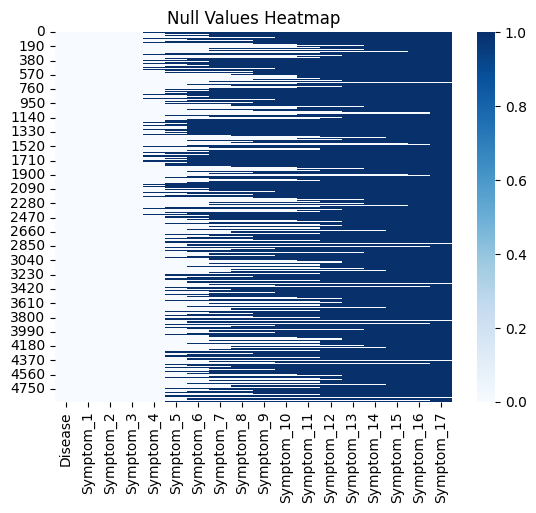

In [37]:
sns.heatmap(df.isnull(), cmap='Blues')
plt.title('Null Values Heatmap')
plt.show()


In [38]:
df.isnull().sum()


Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      347
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [39]:
df = df.apply(lambda x: x.str.strip() )
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.lower() )
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(' ', ''))


df = df.fillna(0)

symptoms = list(set(df.iloc[:,1:].values.flatten()))
symptoms.remove(0)

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,joint_pain,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


##### Encoding  the symptoms with their severity weight

In [40]:
# Create a dictionary mapping each symptom to its severity
severity_map = dict(zip(df1['Symptom'], df1['weight']))

     

# replace the symptoms  with their severity
encoded_df =df.replace(severity_map)

encoded_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


#### Storing the diseases and encoded symptoms in seperate dataframes

In [41]:
cols = df.columns

(encoded_df[cols] == 0).all()

encoded_df['Disease'].value_counts()

encoded_df['Disease'].unique()

data = encoded_df.iloc[:,1:].values  
labels = encoded_df['Disease'].values 

#### Splitting the data 


In [42]:

# First, split into training and temp (test + validation)
x_train, x_temp, y_train, y_temp = train_test_split(data, labels, train_size=0.7, shuffle=True, random_state=42)

# Then split the temp set into test and validation
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)

# Output the shapes of the resulting arrays
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape, y_val.shape)


(3444, 17) (738, 17) (3444,) (738,) (738, 17) (738,)


### Model Training and Testing

####  Random Forest Classifier

[[18  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 22]]
Accuracy% = 99.45799457994579
F1 Score = 99.47051949355472


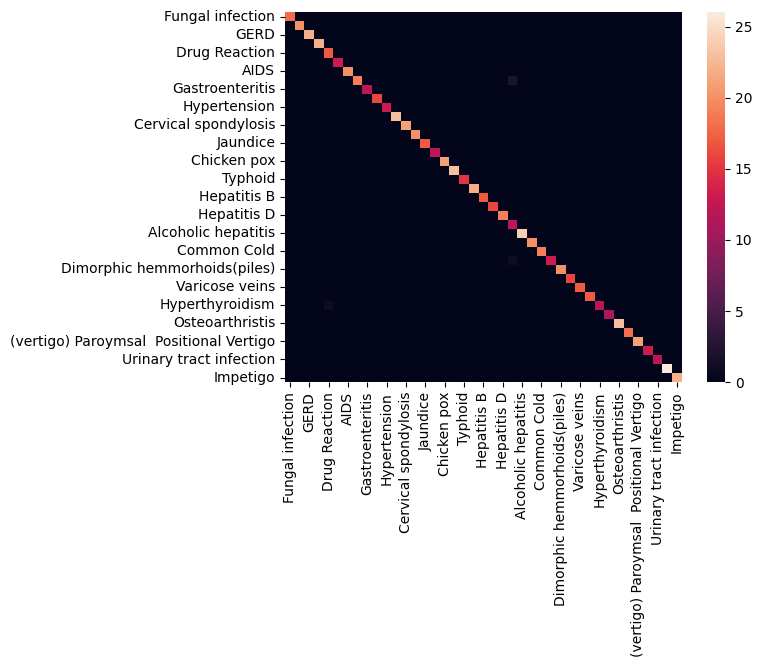

In [43]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
result = rfc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)
print(conf_mat)

rfc_score = accuracy_score(y_test, result) * 100

print('Accuracy% =', rfc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') *  100)



#### Decision Tree Classifier

Accuracy% = 99.45799457994579
F1 Score = 99.47051949355472


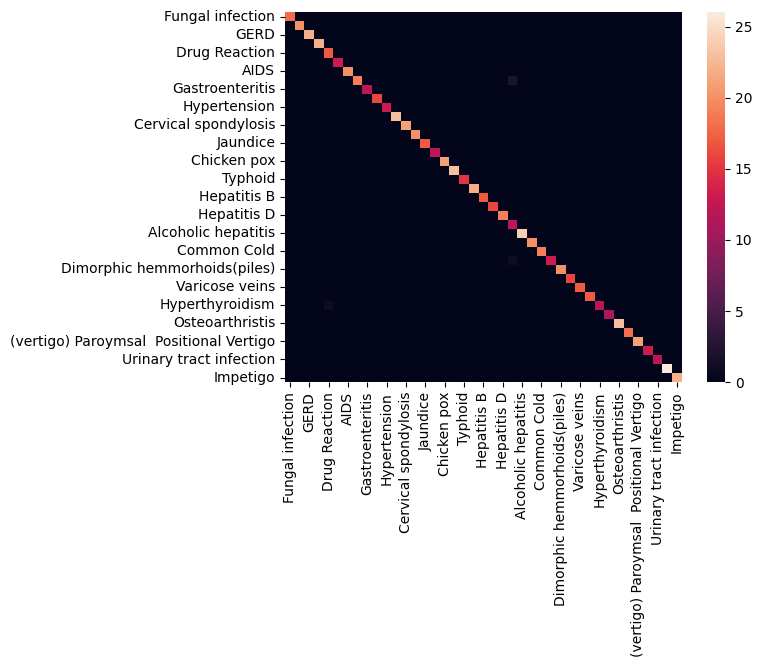

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
result = dtc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

dtc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', dtc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)


#### Naives Bayes Classifier

Accuracy% = 86.85636856368563
F1 Score = 86.26030784781669


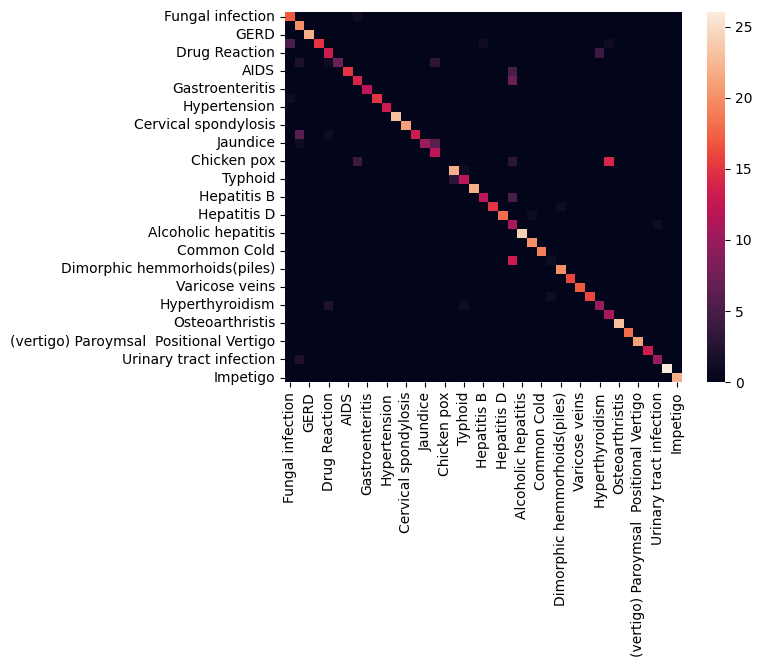

In [45]:
nbc = GaussianNB()
nbc.fit(x_train, y_train)
result = nbc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

nbc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', nbc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)


#### K-Nearest Neighbors Classifier

Accuracy% = 99.7289972899729
F1 Score = 99.72842373926386


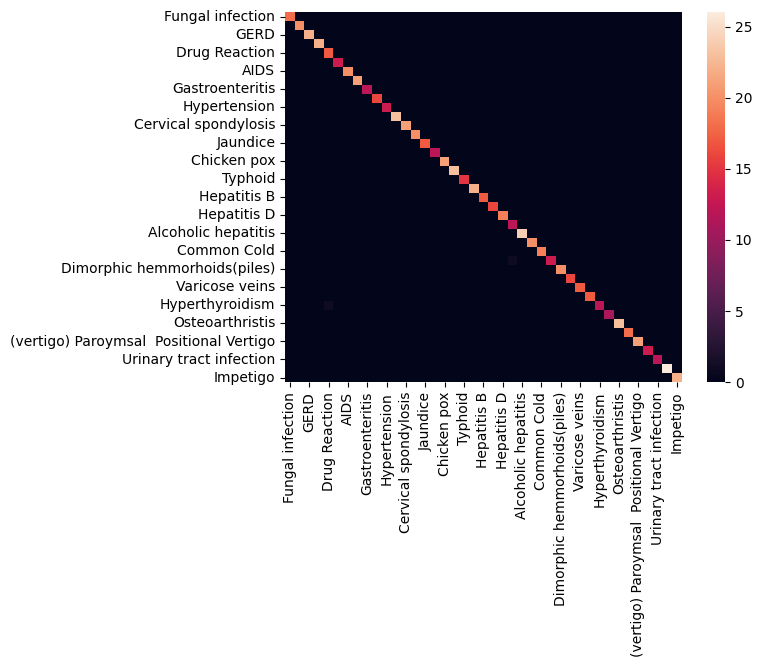

In [46]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
result = knc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

knc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', knc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)

#### Support Vector Classifier

Accuracy% = 91.32791327913279
F1 Score = 91.20976171951442


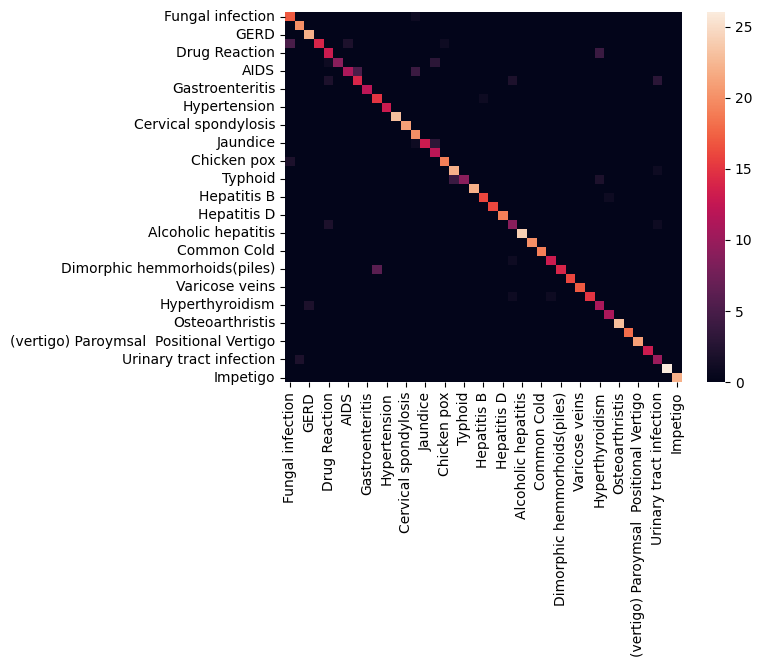

In [47]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
result = svc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

svc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', svc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)

My New models

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import os

# Ignore FutureWarnings from Scikit-Learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Set TensorFlow logging level to suppress debug info
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


2024-11-04 11:33:51.403070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:

# Assuming data and labels are defined earlier in your code
# First, split into training and temp (test + validation)
x_train, x_temp, y_train, y_temp = train_test_split(data, labels, train_size=0.7, shuffle=True, random_state=42)

# Then split the temp set into test and validation
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)

# Output the shapes of the resulting arrays
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape, y_val.shape)

# Encode the labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

(3444, 17) (738, 17) (3444,) (738,) (738, 17) (738,)


Random Forest Classifier

Train accuracy: 0.9927409988385598
Test accuracy: 0.994579945799458
Validation accuracy: 0.991869918699187
Accuracy% = 99.45799457994579
F1 Score = 99.47051949355472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        20
           7       1.00      0.90      0.95        21
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        20
          14       1.00

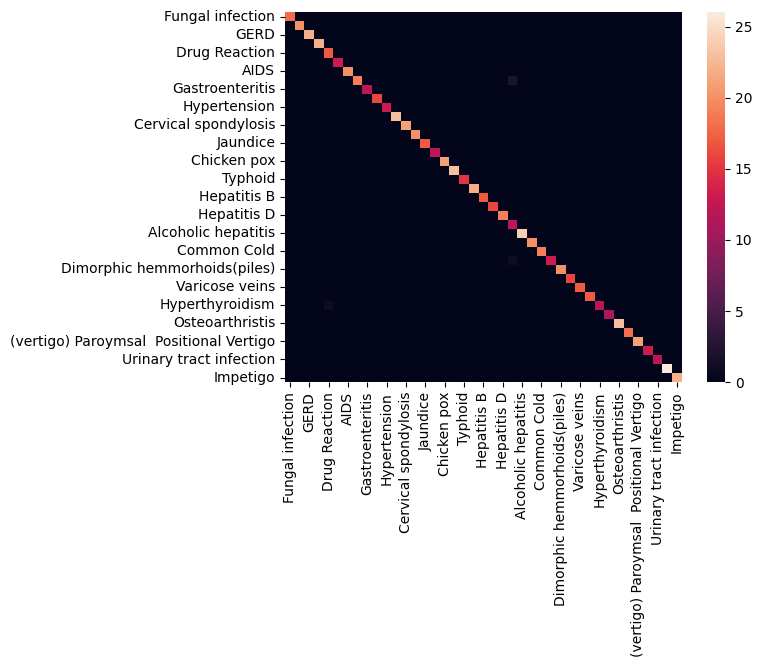

In [21]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the Random Forest model
rf.fit(x_train, y_train_encoded)

# Evaluate the model
train_score = rf.score(x_train, y_train_encoded)
test_score = rf.score(x_test, y_test_encoded)
val_score = rf.score(x_val, y_val_encoded)

print("Train accuracy:", train_score)
print("Test accuracy:", test_score)
print("Validation accuracy:", val_score)



# Optionally, you can print a detailed classification report
rf_y_pred = rf.predict(x_test)
conf_mat = confusion_matrix(y_test_encoded, rf_y_pred)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

sns.heatmap(df_cm)

rf_accuracy_score = accuracy_score(y_test_encoded, rf_y_pred) * 100

print( 'Accuracy% =', rf_accuracy_score)
print('F1 Score =', f1_score(y_test_encoded, rf_y_pred, average='weighted') * 100)
print(classification_report(y_test_encoded, rf_y_pred))


Decision Tree Classifier

In [22]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt.fit(x_train, y_train_encoded)

# Evaluate the model
train_score = dt.score(x_train, y_train_encoded)
dt_test_score = dt.score(x_test, y_test_encoded)
val_score = dt.score(x_val, y_val_encoded)
print("Train accuracy:", train_score)
print("Test accuracy:", dt_test_score)
print("Validation accuracy:", val_score)

# Optionally, you can print a detailed classification report
dt_y_pred = dt.predict(x_test)
dt_accuracy_score = accuracy_score(y_test_encoded, dt_y_pred) * 100
print(classification_report(y_test_encoded, dt_y_pred))

Train accuracy: 0.9927409988385598
Test accuracy: 0.994579945799458
Validation accuracy: 0.991869918699187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        20
           7       1.00      0.90      0.95        21
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        17
          15       1.00     

Naive Bayes Classifier

In [23]:
# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the Gaussian Naive Bayes model
nb.fit(x_train, y_train_encoded)

# Evaluate the model
train_score = nb.score(x_train, y_train_encoded)
nb_test_score = nb.score(x_test, y_test_encoded)
val_score = nb.score(x_val, y_val_encoded)

print("Train accuracy:", train_score)
print("Test accuracy:", nb_test_score)
print("Validation accuracy:", val_score)

# Optionally, you can print a detailed classification report
nb_y_pred = nb.predict(x_test)
nb_accuracy_score = accuracy_score(y_test_encoded, nb_y_pred) * 100

print(classification_report(y_test_encoded, nb_y_pred))

Train accuracy: 0.8777584204413472
Test accuracy: 0.8685636856368564
Validation accuracy: 0.8482384823848238
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.65      1.00      0.78        20
           2       1.00      1.00      1.00        22
           3       1.00      0.68      0.81        22
           4       0.76      0.76      0.76        17
           5       1.00      0.54      0.70        13
           6       1.00      0.75      0.86        20
           7       0.74      0.67      0.70        21
           8       1.00      1.00      1.00        12
           9       1.00      0.94      0.97        16
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      0.65      0.79        20
          14       1.00      0.59      0.74        17
          15       0.57   

/home/blaise/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/blaise/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/blaise/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Classifier 

In [24]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
}

# Initialize the SVC classifier
svc = SVC()

# Initialize GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(x_train, y_train_encoded)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model
best_model = grid_search.best_estimator_
train_score = best_model.score(x_train, y_train_encoded)
svc_test_score = best_model.score(x_test, y_test_encoded)
val_score = best_model.score(x_val, y_val_encoded)

print("Train accuracy:", train_score)
print("Test accuracy:", svc_test_score)
print("Validation accuracy:", val_score)

# Print a detailed classification report
svc_y_pred = best_model.predict(x_test)
svc_accuracy_score = accuracy_score(y_test_encoded, svc_y_pred) * 100

print(classification_report(y_test_encoded, svc_y_pred))


Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.9912900394910048
Train accuracy: 0.9927409988385598
Test accuracy: 0.994579945799458
Validation accuracy: 0.991869918699187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        20
           7       1.00      0.90      0.95        21
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00

## Weighted KNN Classifier 

In [25]:
# Initialize the weighted KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the weighted KNN model
knn.fit(x_train, y_train_encoded)

# Evaluate the model
train_score = knn.score(x_train, y_train_encoded)
knn_test_score = knn.score(x_test, y_test_encoded)
val_score = knn.score(x_val, y_val_encoded)

print("Train accuracy:", train_score)
print("Test accuracy:", knn_test_score)
print("Validation accuracy:", val_score)

# Optionally, you can print a detailed classification report
knn_y_pred = knn.predict(x_test)
knn_accuracy_score = accuracy_score(y_test_encoded, knn_y_pred) * 100
print("KNN Accuracy:",knn_accuracy_score)
print(classification_report(y_test_encoded, knn_y_pred))

Train accuracy: 0.9915795586527294
Test accuracy: 0.997289972899729
Validation accuracy: 0.9932249322493225
KNN Accuracy: 99.7289972899729
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00       

XG Boost Classifier

In [26]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'CatBoost': CatBoostClassifier(silent=True),
    'GradientBoost': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier()
}

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(x_train, y_train_encoded)

    # Evaluate the model
    train_score = classifier.score(x_train, y_train_encoded)
    test_score = classifier.score(x_test, y_test_encoded)
    val_score = classifier.score(x_val, y_val_encoded)

    print("Train accuracy:", train_score)
    print("Test accuracy:", test_score)
    print("Validation accuracy:", val_score)

    # Optionally, you can print a detailed classification report
    y_pred = classifier.predict(x_test)
    print(classification_report(y_test_encoded, y_pred))


Training Random Forest...
Train accuracy: 0.9927409988385598
Test accuracy: 0.994579945799458
Validation accuracy: 0.991869918699187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        22
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        20
           7       1.00      0.90      0.95        21
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        17
  

# Hyper parameter finetuning with GridSearchCV

In [50]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

import numpy as np
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'K Nearest Neighbours': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Naive Bayes': {
        'var_smoothing': np.logspace(-9, 0, 10)
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    }
}

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'K Nearest Neighbours': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Perform GridSearchCV for each classifier
best_models = {}
for name, classifier in classifiers.items():
    print(f"Training {name} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train_encoded)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Score for {name}: {grid_search.best_score_}")

# Evaluate the best models
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    train_score = model.score(x_train, y_train_encoded)
    test_score = model.score(x_test, y_test_encoded)
    val_score = model.score(x_val, y_val_encoded)
    print(f"Train accuracy for {name}: {train_score}")
    print(f"Test accuracy for {name}: {test_score}")
    print(f"Validation accuracy for {name}: {val_score}")
    y_pred = model.predict(x_test)
    print(classification_report(y_test_encoded, y_pred))
    # BEGIN: Import CatBoostClassifier
    # END: Import CatBoostClassifier

Training Decision Tree with GridSearchCV...


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9915803152529786
Training Random Forest with GridSearchCV...
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10}
Best Score for Random Forest: 0.9918705910149527
Training SVC with GridSearchCV...
Best Parameters for SVC: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score for SVC: 0.9912900394910048
Training K Nearest Neighbours with GridSearchCV...


/home/blaise/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for K Nearest Neighbours: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score for K Nearest Neighbours: 0.9921608667769265
Training Naive Bayes with GridSearchCV...
Best Parameters for Naive Bayes: {'var_smoothing': 0.01}
Best Score for Naive Bayes: 0.9277023492084921
Training Gradient Boosting with GridSearchCV...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score for Gradient Boosting: 0.9915803152529786
Training Extra Trees with GridSearchCV...
Best Parameters for Extra Trees: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Score for Extra Trees: 0.9915803152529786
Training XGBoost with GridSearchCV...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score for XGBoost: 0.9915803152529786
Training LightGBM with GridSearchCV...


## Neural Network classifier

In [28]:
# One-hot encode the integer labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))
y_val_onehot = onehot_encoder.transform(y_val_encoded.reshape(-1, 1))

# Convert numpy arrays to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
X_eval_tensor = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_onehot, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test_onehot, dtype=tf.float32)
y_eval_tensor = tf.convert_to_tensor(y_val_onehot, dtype=tf.float32)

# Number of unique classes in the labels
num_classes = y_train_onehot.shape[1]


2024-11-04 10:53:25.051819: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Dense Multilayer Neural Network with Keras

In [29]:
with tf.device('/GPU:0'):
    model_1 = keras.Sequential([
        layers.Input(shape=(X_train_tensor.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(128, activation='tanh'),
        layers.BatchNormalization(),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')])
    
    model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, mode='max')
    history = model_1.fit(X_train_tensor, y_train_tensor, epochs=500, callbacks=[early_stopping],
                          batch_size=16, validation_data=(X_eval_tensor, y_eval_tensor))


Epoch 1/500
216/216 [==============================] - 9s 29ms/step - loss: 2.3069 - accuracy: 0.3943 - val_loss: 0.9634 - val_accuracy: 0.7981
Epoch 2/500
216/216 [==============================] - 6s 26ms/step - loss: 0.7506 - accuracy: 0.7863 - val_loss: 0.3751 - val_accuracy: 0.8997
Epoch 3/500
216/216 [==============================] - 5s 24ms/step - loss: 0.5089 - accuracy: 0.8418 - val_loss: 0.2764 - val_accuracy: 0.9241
Epoch 4/500
216/216 [==============================] - 5s 23ms/step - loss: 0.3763 - accuracy: 0.8783 - val_loss: 0.1845 - val_accuracy: 0.9363
Epoch 5/500
216/216 [==============================] - 6s 29ms/step - loss: 0.3079 - accuracy: 0.8998 - val_loss: 0.1906 - val_accuracy: 0.9309
Epoch 6/500
216/216 [==============================] - 8s 37ms/step - loss: 0.2695 - accuracy: 0.9065 - val_loss: 0.1086 - val_accuracy: 0.9539
Epoch 7/500
216/216 [==============================] - 6s 26ms/step - loss: 0.2490 - accuracy: 0.9199 - val_loss: 0.1103 - val_accuracy:

In [30]:
model_1.evaluate(X_test_tensor, y_test_tensor)


24/24 [==============================] - 0s 15ms/step - loss: 0.0549 - accuracy: 0.9824


[0.05490051954984665, 0.9823848009109497]

Train With LSTM

In [31]:

# tf.get_logger().setLevel('ERROR')
# Add a new dimension to the input data to be in 3D Recomended by LSTM
x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)
x_val = np.expand_dims(x_val, axis=1)

# Convert numpy arrays to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
X_eval_tensor = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_onehot, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test_onehot, dtype=tf.float32)
y_eval_tensor = tf.convert_to_tensor(y_val_onehot, dtype=tf.float32)

# Number of unique classes in the labels
num_classes = y_train_onehot.shape[1]

with tf.device('/GPU:0'):
    model_LSTM = keras.Sequential([
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),  
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(64),
        layers.Dropout(0.1),
        layers.Dense(128, activation='tanh'),
        layers.BatchNormalization(),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, mode='max')
    history = model_LSTM.fit(X_train_tensor, y_train_tensor, epochs=500, callbacks=[early_stopping],
                             batch_size=16, validation_data=(X_eval_tensor, y_eval_tensor))


2024-11-04 10:54:55.564712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-04 10:54:55.567770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-04 10:54:55.569749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/500


2024-11-04 10:54:55.839076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-04 10:54:55.841116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-04 10:54:55.843282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

216/216 [==============================] - ETA: 0s - loss: 2.0390 - accuracy: 0.4178

2024-11-04 10:55:12.046834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-04 10:55:12.050668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-04 10:55:12.053729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

216/216 [==============================] - 18s 49ms/step - loss: 2.0390 - accuracy: 0.4178 - val_loss: 2.0616 - val_accuracy: 0.7425
Epoch 2/500
216/216 [==============================] - 9s 42ms/step - loss: 0.7450 - accuracy: 0.7787 - val_loss: 0.6227 - val_accuracy: 0.8740
Epoch 3/500
216/216 [==============================] - 11s 50ms/step - loss: 0.4952 - accuracy: 0.8473 - val_loss: 0.3296 - val_accuracy: 0.9119
Epoch 4/500
216/216 [==============================] - 8s 37ms/step - loss: 0.3788 - accuracy: 0.8708 - val_loss: 0.2095 - val_accuracy: 0.9417
Epoch 5/500
216/216 [==============================] - 8s 35ms/step - loss: 0.2906 - accuracy: 0.9077 - val_loss: 0.1909 - val_accuracy: 0.9485
Epoch 6/500
216/216 [==============================] - 10s 48ms/step - loss: 0.2750 - accuracy: 0.9109 - val_loss: 0.1413 - val_accuracy: 0.9417
Epoch 7/500
216/216 [==============================] - 10s 48ms/step - loss: 0.2538 - accuracy: 0.9193 - val_loss: 0.1363 - val_accuracy: 0.9472


In [32]:
model_LSTM.evaluate(X_test_tensor, y_test_tensor)


24/24 [==============================] - 1s 17ms/step - loss: 0.1193 - accuracy: 0.9539


[0.11930473893880844, 0.9539295434951782]

Train With GRU

In [33]:
# Building the model using GRU layers
with tf.device('/GPU:0'):
    model_GRU = keras.Sequential([
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),  
        layers.Reshape((1, -1)),  # Add a timestep dimension
        layers.GRU(32, return_sequences=True),
        layers.GRU(64),
        layers.Dropout(0.1),
        layers.Dense(128, activation='tanh'),
        layers.BatchNormalization(),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, mode='max')
    history = model_GRU.fit(X_train_tensor, y_train_tensor, epochs=500, callbacks=[early_stopping],
                          batch_size=16, validation_data=(X_eval_tensor, y_eval_tensor))


2024-11-04 10:56:32.577518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-04 10:56:32.579801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-04 10:56:32.581673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/500


2024-11-04 10:56:32.834666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-04 10:56:32.836324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-04 10:56:32.838037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

215/216 [============================>.] - ETA: 0s - loss: 2.1965 - accuracy: 0.4047

2024-11-04 10:56:48.939707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-04 10:56:48.942295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-04 10:56:48.944743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

216/216 [==============================] - 17s 47ms/step - loss: 2.1956 - accuracy: 0.4048 - val_loss: 1.5968 - val_accuracy: 0.7195
Epoch 2/500
216/216 [==============================] - 11s 51ms/step - loss: 0.7627 - accuracy: 0.7822 - val_loss: 0.5941 - val_accuracy: 0.8564
Epoch 3/500
216/216 [==============================] - 12s 55ms/step - loss: 0.4759 - accuracy: 0.8566 - val_loss: 0.3298 - val_accuracy: 0.9079
Epoch 4/500
216/216 [==============================] - 12s 55ms/step - loss: 0.3675 - accuracy: 0.8839 - val_loss: 0.2895 - val_accuracy: 0.9119
Epoch 5/500
216/216 [==============================] - 10s 48ms/step - loss: 0.3134 - accuracy: 0.8981 - val_loss: 0.2697 - val_accuracy: 0.9038
Epoch 6/500
216/216 [==============================] - 8s 37ms/step - loss: 0.2658 - accuracy: 0.9138 - val_loss: 0.1533 - val_accuracy: 0.9593
Epoch 7/500
216/216 [==============================] - 8s 39ms/step - loss: 0.2329 - accuracy: 0.9196 - val_loss: 0.1186 - val_accuracy: 0.9661

In [34]:
model_GRU.evaluate(X_test_tensor, y_test_tensor)


24/24 [==============================] - 0s 9ms/step - loss: 0.0334 - accuracy: 0.9932


[0.03344691917300224, 0.9932249188423157]

In [35]:
X_train_tensor

<tf.Tensor: shape=(3444, 1, 17), dtype=float32, numpy=
array([[[3., 4., 4., ..., 0., 0., 0.]],

       [[3., 4., 4., ..., 0., 0., 0.]],

       [[3., 7., 4., ..., 0., 0., 0.]],

       ...,

       [[3., 3., 3., ..., 0., 0., 0.]],

       [[1., 3., 4., ..., 0., 0., 0.]],

       [[1., 3., 5., ..., 0., 0., 0.]]], dtype=float32)>

In [36]:
y_train_tensor

<tf.Tensor: shape=(3444, 41), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

#### Comparing the accuracy of all the models

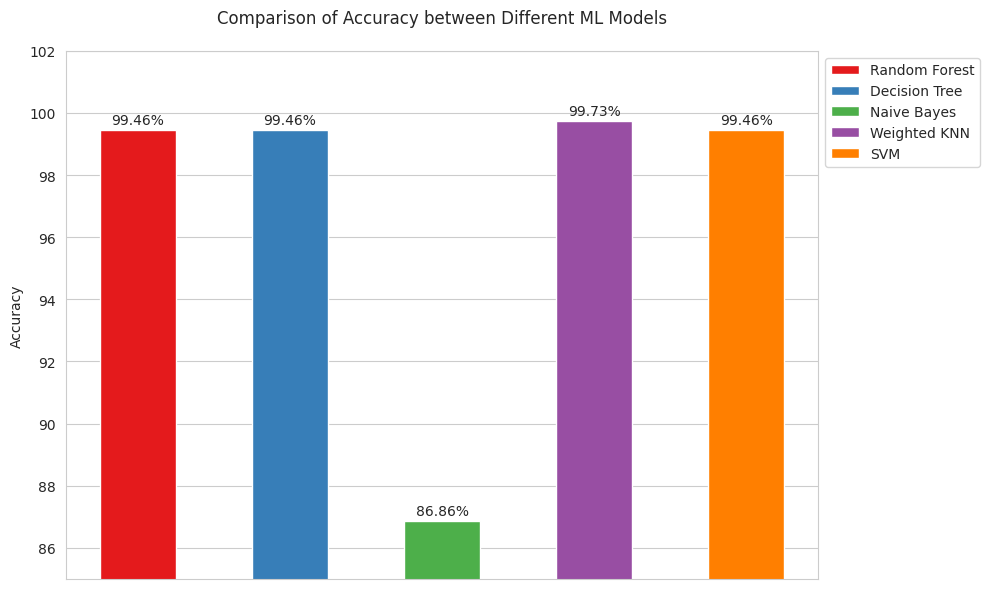

In [37]:
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'Weighted KNN', 'SVM']
accuracies = [rf_accuracy_score, dt_accuracy_score, nb_accuracy_score, knn_accuracy_score, svc_accuracy_score]

# Set the style
sns.set_style("whitegrid")

# Define the colors for each bar
colors = sns.color_palette("Set1", len(models))

# Create the figure and axis with an appropriate figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width as needed

# Define the width of the bars
bar_width = 0.5

# Create the bar positions to ensure bars are closer
bar_positions = np.arange(len(models))

# Create the bars with individual colors
bars = ax.bar(bar_positions, accuracies, bar_width, color=colors, align='center')

# Add the accuracy value on top of each bar
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{accuracy:.2f}%', ha='center')

# Set the limits, labels, and title
plt.ylim(85, 102)
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy between Different ML Models",pad=20)

# Remove the x-axis labels
ax.set_xticks([])

# Add a legend with colors matching the bars
ax.legend(bars, models, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to fit the legend
plt.tight_layout()

# Display the plot
plt.show()


### Making Predictions

In [38]:
def predict_disease(symptoms_list,model,top_k=5):
    # Encode the symptoms based on their severity
    encoded_symptoms = [severity_map[symptom] for symptom in symptoms_list]
    
    for i  in range(len(encoded_symptoms),17):
        encoded_symptoms.append(0)
        
    # Create a numpy array from the encoded symptoms
    symptoms_array = np.array(encoded_symptoms).reshape(1,-1)
 
     # Use the trained model to predict the probabilities of all diseases
    disease_probs = model.predict_proba(symptoms_array)[0]
    
    # Sort the predicted probabilities in descending order
    sorted_probs_idx = np.argsort(disease_probs)[::-1]
    
    # Get the top-k predicted diseases and their probabilities
    top_k_diseases = [(model.classes_[idx], disease_probs[idx]) for idx in sorted_probs_idx[:top_k]]
    
    return top_k_diseases

In [39]:


def output_predicted_diseases(symptoms_list,model,top_k=5):
    top_k_diseases = predict_disease(symptoms_list,model,top_k)
    
    print('The predicted disease is {} with probability {:.2f}%\n'.format(top_k_diseases[0][0], top_k_diseases[0][1]*100))
    
    print(top_k_diseases)

    predict_diseases = [disease[0] for disease in top_k_diseases]
    
    predict_probs = [disease[1] for disease in top_k_diseases]
    
    sns.set_style("whitegrid")
    sns.set_palette("Set1")
    sns.barplot(x=predict_diseases, y=predict_probs)
    

    plt.xlabel("Different Diseases")
    plt.ylabel("Probability")
    plt.title("Predicted Diseases and their Probabilities")
    plt.tight_layout()
    plt.show()


The predicted disease is Fungal infection with probability 64.00%

[('Fungal infection', 0.64), ('Paralysis (brain hemorrhage)', 0.08), ('Acne', 0.06), ('Psoriasis', 0.06), ('Allergy', 0.06)]


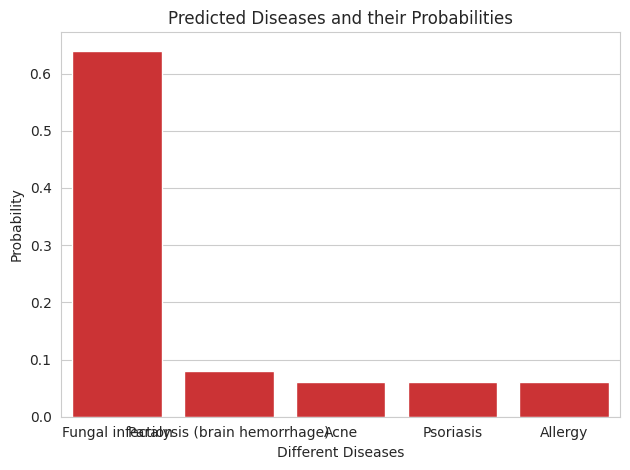

In [40]:
symptomsList = ['itching', 'skin_peeling', 'skin_rash']

output_predicted_diseases(symptomsList,rfc)
      

### Deploying Trained Model

In [41]:
with open('../models/RandomForestClassifier.plk', 'wb') as file:
    pickle.dump(rfc, file)
    
with open('../models/DecisionTreeClassifier.plk', 'wb') as file:
      pickle.dump(dtc, file)
      
with open('../models/GaussianNB.plk', 'wb') as file:
      pickle.dump(nbc, file)

with open('../models/KNeighborsClassifier.plk', 'wb') as file:
      pickle.dump(knc, file)
      
with open('../models/SVC.plk', 'wb') as file:
      pickle.dump(svc, file)
      
with open('../models/symptoms.plk', 'wb') as file:
      pickle.dump(symptoms, file)
      
with open('../models/severity_map.plk', 'wb') as f:
    pickle.dump(severity_map, f)
    
precaution_dict = {}    
    
for row in df3.values:
    precaution_dict[row[0]] = row[1:]   

with open('../models/precaution_dict.plk', 'wb') as f:
    pickle.dump(precaution_dict, f)      